In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data/Melbourne_Housing.csv")
data


,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,03-09-2016,13.5,3042.0,3.0,2.0,1.0,303.0,225,2016.0,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,03-09-2016,3.3,3206.0,2.0,1.0,0.0,120.0,82,1900.0,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,03-09-2016,3.3,3206.0,2.0,1.0,0.0,159.0,inf,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,03-09-2016,6.4,3078.0,3.0,2.0,4.0,853.0,263,1930.0,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,03-09-2016,6.4,3078.0,3.0,2.0,2.0,208.0,inf,2013.0,Northern Metropolitan,2211,1110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27109,Noble Park,3,h,C21,30-09-2017,22.7,3174.0,3.0,1.0,6.0,569.0,130,1959.0,South-Eastern Metropolitan,11806,627500
27110,Reservoir,3,u,RW,30-09-2017,12.0,3073.0,3.0,1.0,1.0,NaN,105,1990.0,Northern Metropolitan,21650,475000
27111,Roxburgh Park,4,h,Raine,30-09-2017,20.6,3064.0,4.0,2.0,2.0,NaN,225,1995.0,Northern Metropolitan,5833,591000
27112,Springvale South,3,h,Harcourts,30-09-2017,22.2,3172.0,3.0,2.0,1.0,544.0,NaN,NaN,South-Eastern Metropolitan,4054,780500


In [25]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10543 non-null  object 
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 3.3+ MB


In [26]:
data["Date"] = pd.to_datetime(data["Date"])
data["Date"].info()


<class 'pandas.core.series.Series'>
RangeIndex: 27114 entries, 0 to 27113
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
27114 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 212.0 KB


/tmp/ipykernel_954/2147044756.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Date"] = pd.to_datetime(data["Date"])


In [27]:
data["BuildingArea"].unique()


array(['225', '82', 'inf', '263', '242', '251', '117', 'missing', '76',
       '399', '118', '103', '180', '123', '218', '129', '167', '154',
       '275', '121', nan, '125', '255', '75', '156', '240', '268', '108',
       '69', '140', '214', '253', '189', '215', '96', '104', '100', '313',
       '144', '93', '110', '70', '122', '51', '147', '113', '83', '56',
       '137', '85', '64', '175', '3558', '170', '265', '353', '138', '19',
       '116', '87', '74', '320', '300', '210', '120', '86', '97', '200',
       '106', '14', '161', '128', '185', '146', '133', '115', '143',
       '150', '195', '236', '276', '188', '179', '249', '141', '34', '73',
       '107', '84', '81', '207', '50', '264', '312', '235', '221', '183',
       '132', '160', '186', '78', '105', '145', '62', '220', '315', '181',
       '61', '112', '420', '226', '266', '410', '449', '356', '477',
       '250', '95', '190', '284', '247', '213', '209', '119', '111',
       '130', '348', '166', '44', '176', '98', '159', '79'

In [28]:
data["BuildingArea"].apply(type).value_counts()


<class 'float'>    16571
<class 'str'>      10543
Name: BuildingArea, dtype: int64

In [29]:
data["BuildingArea"] = data["BuildingArea"].replace(["missing", "inf"], np.nan)
data["BuildingArea"].unique()


array(['225', '82', nan, '263', '242', '251', '117', '76', '399', '118',
       '103', '180', '123', '218', '129', '167', '154', '275', '121',
       '125', '255', '75', '156', '240', '268', '108', '69', '140', '214',
       '253', '189', '215', '96', '104', '100', '313', '144', '93', '110',
       '70', '122', '51', '147', '113', '83', '56', '137', '85', '64',
       '175', '3558', '170', '265', '353', '138', '19', '116', '87', '74',
       '320', '300', '210', '120', '86', '97', '200', '106', '14', '161',
       '128', '185', '146', '133', '115', '143', '150', '195', '236',
       '276', '188', '179', '249', '141', '34', '73', '107', '84', '81',
       '207', '50', '264', '312', '235', '221', '183', '132', '160',
       '186', '78', '105', '145', '62', '220', '315', '181', '61', '112',
       '420', '226', '266', '410', '449', '356', '477', '250', '95',
       '190', '284', '247', '213', '209', '119', '111', '130', '348',
       '166', '44', '176', '98', '159', '79', '71', '60', '33'

In [30]:
data["BuildingArea"] = data["BuildingArea"].astype(float)
data["BuildingArea"].unique()


array([ 225.    ,   82.    ,       nan,  263.    ,  242.    ,  251.    ,
        117.    ,   76.    ,  399.    ,  118.    ,  103.    ,  180.    ,
        123.    ,  218.    ,  129.    ,  167.    ,  154.    ,  275.    ,
        121.    ,  125.    ,  255.    ,   75.    ,  156.    ,  240.    ,
        268.    ,  108.    ,   69.    ,  140.    ,  214.    ,  253.    ,
        189.    ,  215.    ,   96.    ,  104.    ,  100.    ,  313.    ,
        144.    ,   93.    ,  110.    ,   70.    ,  122.    ,   51.    ,
        147.    ,  113.    ,   83.    ,   56.    ,  137.    ,   85.    ,
         64.    ,  175.    , 3558.    ,  170.    ,  265.    ,  353.    ,
        138.    ,   19.    ,  116.    ,   87.    ,   74.    ,  320.    ,
        300.    ,  210.    ,  120.    ,   86.    ,   97.    ,  200.    ,
        106.    ,   14.    ,  161.    ,  128.    ,  185.    ,  146.    ,
        133.    ,  115.    ,  143.    ,  150.    ,  195.    ,  236.    ,
        276.    ,  188.    ,  179.    ,  249.    , 

In [31]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

In [32]:
data.isnull().sum()


Suburb               0
Rooms                0
Type                 0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           6436
Bathroom          6442
Car               6817
Landsize          9241
BuildingArea     16585
YearBuilt        15129
Regionname           0
Propertycount        0
Price                0
dtype: int64

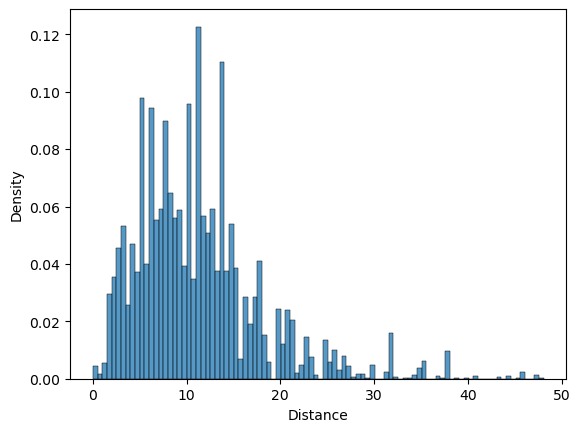

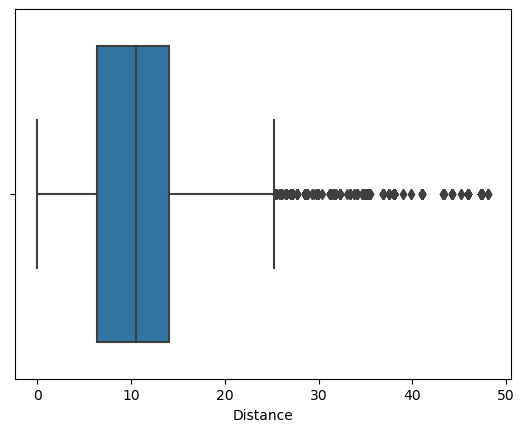

In [33]:
sns.histplot(data=data, x="Distance", stat="density")
plt.show()
sns.boxplot(data=data, x="Distance")
plt.show()


In [34]:
year_at_sale = data["Date"].dt.year
year_at_sale


0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
27109    2017
27110    2017
27111    2017
27112    2017
27113    2017
Name: Date, Length: 27114, dtype: int64

In [35]:
np.max(year_at_sale)


2018

In [36]:
data["ageOfProp"] = year_at_sale - data["YearBuilt"]
data["ageOfProp"]


0          0.0
1        116.0
2          NaN
3         86.0
4          3.0
         ...  
27109     58.0
27110     27.0
27111     22.0
27112      NaN
27113     57.0
Name: ageOfProp, Length: 27114, dtype: float64

In [37]:
data


,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,ageOfProp
0,Airport West,3,t,Nelson,2016-03-09,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000,0.0
1,Albert Park,2,h,hockingstuart,2016-03-09,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,116.0
2,Albert Park,2,h,Thomson,2016-03-09,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,NaN
3,Alphington,4,h,Brace,2016-03-09,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,86.0
4,Alphington,3,h,Jellis,2016-03-09,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27109,Noble Park,3,h,C21,2017-09-30,22.7,3174.0,3.0,1.0,6.0,569.0,130.0,1959.0,South-Eastern Metropolitan,11806,627500,58.0
27110,Reservoir,3,u,RW,2017-09-30,12.0,3073.0,3.0,1.0,1.0,NaN,105.0,1990.0,Northern Metropolitan,21650,475000,27.0
27111,Roxburgh Park,4,h,Raine,2017-09-30,20.6,3064.0,4.0,2.0,2.0,NaN,225.0,1995.0,Northern Metropolitan,5833,591000,22.0
27112,Springvale South,3,h,Harcourts,2017-09-30,22.2,3172.0,3.0,2.0,1.0,544.0,NaN,NaN,South-Eastern Metropolitan,4054,780500,NaN


In [38]:
data[data["ageOfProp"] < 0]


,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,ageOfProp
286,Avondale Heights,3,t,Nelson,2016-03-12,10.5,3034.0,3.0,3.0,1.0,557.0,181.0,2017.0,Western Metropolitan,4502,851000,-1.0
13861,Bentleigh,3,h,Woodards,2018-03-17,11.4,3204.0,3.0,1.0,4.0,635.0,242.0,2019.0,Southern Metropolitan,6795,1100000,-1.0
15240,Reservoir,4,h,Barry,2016-09-17,11.2,3073.0,3.0,2.0,2.0,834.0,129.0,2017.0,Northern Metropolitan,21650,767500,-1.0
19472,Keilor East,3,h,Nelson,2016-04-23,12.8,3033.0,3.0,2.0,1.0,630.0,126.0,2017.0,Western Metropolitan,5629,825000,-1.0
21336,Brighton East,2,h,Buxton,2016-09-24,10.7,3187.0,4.0,3.0,2.0,302.0,250.0,2018.0,Southern Metropolitan,6938,1310000,-2.0
24908,Newport,3,h,Jas,2016-05-28,8.4,3015.0,4.0,2.0,1.0,487.0,190.0,2017.0,Western Metropolitan,5498,945000,-1.0
27080,Heidelberg,3,h,Miles,2016-07-30,10.6,3084.0,5.0,3.0,2.0,649.0,357.0,2017.0,Eastern Metropolitan,2890,1030000,-1.0


In [39]:
data.shape


(27114, 17)

In [40]:
def nullStadistics():
    return pd.DataFrame(
        {
            "Count": data.isnull().sum()[data.isnull().sum() > 0],
            "Percentage": (
                data.isnull().sum()[data.isnull().sum() > 0] / data.shape[0] * 100
            ),
        }
    )


nullStadistics()

,Count,Percentage
Distance,1,0.003688
Postcode,1,0.003688
Bedroom,6436,23.736815
Bathroom,6442,23.758944
Car,6817,25.141993
Landsize,9241,34.082024
BuildingArea,16585,61.167662
YearBuilt,15129,55.797743
ageOfProp,15129,55.797743


In [41]:
data.loc[data["Distance"].isnull() == True]


,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,ageOfProp
9594,Fawkner Lot,3,h,Brad,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN


In [42]:
data.loc[data["Suburb"] == "Fawkner Lot"]


,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,ageOfProp
9594,Fawkner Lot,3,h,Brad,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN


In [43]:
data = data.drop(9594).reset_index(drop=True)


In [44]:
data.loc[data["Suburb"] == "Fawkner Lot"]


,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,ageOfProp


In [45]:
nullStadistics()

,Count,Percentage
Bedroom,6435,23.734002
Bathroom,6441,23.756132
Car,6816,25.139232
Landsize,9240,34.079593
BuildingArea,16584,61.166230
YearBuilt,15128,55.796113
ageOfProp,15128,55.796113


In [52]:
data[data['Bedroom'].isnull()==True]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,ageOfProp
8,Altona North,4,h,hockingstuart,2016-03-09,11.1,3025.0,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,5132,857500,NaN
12,Ashburton,2,h,Marshall,2016-03-09,11.0,3147.0,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,3052,1820000,NaN
14,Avondale Heights,4,h,Jellis,2016-03-09,10.5,3034.0,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,4502,1310000,NaN
25,Balwyn North,4,u,hockingstuart,2016-03-09,9.2,3104.0,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1450000,NaN
26,Balwyn North,2,h,Fletchers,2016-03-09,9.2,3104.0,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1305000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27099,Footscray,2,u,McGrath,2017-09-30,5.1,3011.0,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,7570,455500,NaN
27100,Forest Hill,2,h,Fletchers,2017-09-30,15.4,3131.0,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,4385,762000,NaN
27101,Glen Waverley,3,u,Ray,2017-09-30,16.7,3150.0,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,15321,1100000,NaN
27104,Kingsbury,2,t,RW,2017-09-30,12.1,3083.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,1414,512000,NaN


In [57]:
data.loc[data['Bathroom'].isnull()==True]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,ageOfProp
8,Altona North,4,h,hockingstuart,2016-03-09,11.1,3025.0,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,5132,857500,NaN
12,Ashburton,2,h,Marshall,2016-03-09,11.0,3147.0,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,3052,1820000,NaN
14,Avondale Heights,4,h,Jellis,2016-03-09,10.5,3034.0,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,4502,1310000,NaN
25,Balwyn North,4,u,hockingstuart,2016-03-09,9.2,3104.0,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1450000,NaN
26,Balwyn North,2,h,Fletchers,2016-03-09,9.2,3104.0,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1305000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27099,Footscray,2,u,McGrath,2017-09-30,5.1,3011.0,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,7570,455500,NaN
27100,Forest Hill,2,h,Fletchers,2017-09-30,15.4,3131.0,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,4385,762000,NaN
27101,Glen Waverley,3,u,Ray,2017-09-30,16.7,3150.0,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,15321,1100000,NaN
27104,Kingsbury,2,t,RW,2017-09-30,12.1,3083.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,1414,512000,NaN


In [58]:
data.loc[data['Bathroom'].isnull()==True,'Bedroom']

8       NaN
12      NaN
14      NaN
25      NaN
26      NaN
         ..
27099   NaN
27100   NaN
27101   NaN
27104   NaN
27106   NaN
Name: Bedroom, Length: 6441, dtype: float64

In [59]:
data.loc[data['Bedroom'].isnull()==True,'Bedroom'].value_counts() # values_count dous't count by default how many null values are 

Series([], Name: Bedroom, dtype: int64)

In [56]:
data.loc[data['Bedroom'].isnull()==True,'Bedroom'].value_counts(dropna=False)

NaN    6435
Name: Bedroom, dtype: int64

In [64]:
data.loc[data['Bedroom'].isnull()==True,'Bathroom'].value_counts(dropna=False)

NaN    6435
Name: Bathroom, dtype: int64

In [60]:
data.loc[data['Bedroom'].isnull()==True,'Car'].value_counts(dropna=False)

NaN    6435
Name: Car, dtype: int64

In [65]:
data.loc[data['Bedroom'].isnull()==True,'Landsize'].value_counts(dropna=False)

NaN      6429
594.0       1
446.0       1
338.0       1
250.0       1
549.0       1
239.0       1
Name: Landsize, dtype: int64

In [66]:
data.loc[data['Bedroom'].isnull()==True,'BuildingArea'].value_counts(dropna=False)

NaN    6435
Name: BuildingArea, dtype: int64

In [62]:
data.loc[data['Bedroom'].isnull()==True,'YearBuilt'].value_counts(dropna=False)

NaN    6435
Name: YearBuilt, dtype: int64

In [63]:
data.loc[data['Bedroom'].isnull()==True,'ageOfProp'].value_counts(dropna=False)

NaN    6435
Name: ageOfProp, dtype: int64